<h1 align="center" style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">Digital Green Crop Yield Estimate Challenge</h1>

<a id='table_of_contents'></a>
<h2 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">Table of Contents</h2>

1. <a href="#import" style="text-decoration: None">Import Libraries and Dataset</a>
2. <a href="#data_preview" style="text-decoration: None">Dataset Preview</a>
3. <a href="#data_wrangling" style="text-decoration: None">Data Wrangling</a>
4. <a href="#eda" style="text-decoration: None">Exploratory Data Analysis</a>
    - <a href="#univariate" style="text-decoration: None">Univariate Analysis</a>
    - <a href="#bivariate" style="text-decoration: None">Bivariate Analysis</a>
5. <a href="#data_preprocessing" style="text-decoration: None">Data Preparation and Preprocessing</a>
6. <a href="#baseline" style="text-decoration: None">Baseline Models</a>
7. <a href="#optimization" style="text-decoration: None">Optimization: Hyperparameter Tuning</a>
    - <a href="#grid_search_cv" style="text-decoration: None">Grid Search CV</a>
    - <a href="#randomized_search_cv" style="text-decoration: None">Randomized Search CV</a>
    - <a href="#bayes_optimization" style="text-decoration: None">Bayesian Optimization with Gaussian Process</a>
8. <a href="#pred_test_data" style="text-decoration: None">Make Prediction on Test Data</a>

<a id="import"></a>
<h2 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">1. Import Libraries and Load Dataset</h2>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 120)
pd.set_option("display.max_rows", 120)
pd.set_option('display.float_format', '{:.2f}'.format)

import warnings
import time
warnings.filterwarnings("ignore")

In [2]:
try:
    train_df = pd.read_csv('/kaggle/input/digital-crop-yield-estimate-challenge-zindi-zip/Train.csv')
    test_df = pd.read_csv('/kaggle/input/digital-crop-yield-estimate-challenge-zindi-zip/Test.csv')
    submission_df = pd.read_csv('/kaggle/input/digital-crop-yield-estimate-challenge-zindi-zip/SampleSubmission.csv')
except:
    train_df = pd.read_csv('digital-crop-yield-estimate-challenge-zindi-zip/Train.csv')
    test_df = pd.read_csv('digital-crop-yield-estimate-challenge-zindi-zip/Test.csv')
    submission_df = pd.read_csv('digital-crop-yield-estimate-challenge-zindi-zip/SampleSubmission.csv')

<a id="data_preview"></a>
<h2 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">2. Dataset Preview</h2>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [3]:
train_df.head()

,ID,District,Block,CultLand,CropCultLand,LandPreparationMethod,CropTillageDate,CropTillageDepth,CropEstMethod,RcNursEstDate,SeedingSowingTransplanting,SeedlingsPerPit,NursDetFactor,TransDetFactor,TransplantingIrrigationHours,TransplantingIrrigationSource,TransplantingIrrigationPowerSource,TransIrriCost,StandingWater,OrgFertilizers,Ganaura,CropOrgFYM,PCropSolidOrgFertAppMethod,NoFertilizerAppln,CropbasalFerts,BasalDAP,BasalUrea,MineralFertAppMethod,FirstTopDressFert,1tdUrea,1appDaysUrea,2tdUrea,2appDaysUrea,MineralFertAppMethod.1,Harv_method,Harv_date,Harv_hand_rent,Threshing_date,Threshing_method,Residue_length,Residue_perc,Stubble_use,Acre,Yield
0,ID_GTFAC7PEVWQ9,Nalanda,Noorsarai,45,40,TractorPlough FourWheelTracRotavator,2022-07-20,5,Manual_PuddledRandom,2022-06-27,2022-07-21,2.00,CalendarDate IrrigWaterAvailability SeedAvaila...,CalendarDate SeedlingAge RainArrival IrrigWate...,5.00,Boring,Electric,200.00,2.00,NaN,NaN,NaN,NaN,2,Urea,NaN,20.00,Broadcasting,Urea,15.00,18.00,NaN,NaN,Broadcasting,machine,2022-11-16,NaN,2022-11-16,machine,30,40,plowed_in_soil,0.31,600
1,ID_TK40ARLSPOKS,Nalanda,Rajgir,26,26,WetTillagePuddling TractorPlough FourWheelTrac...,2022-07-18,5,Manual_PuddledRandom,2022-06-20,2022-07-20,2.00,CalendarDate PreMonsoonShowers IrrigWaterAvail...,CalendarDate SeedlingAge RainArrival IrrigWate...,5.00,Boring,Electric,125.00,3.00,NaN,NaN,NaN,NaN,2,DAP Urea,15.00,10.00,Broadcasting,Urea,20.00,39.00,NaN,NaN,Broadcasting,hand,2022-11-25,3.00,2022-12-24,machine,24,10,plowed_in_soil,0.31,600
2,ID_1FJY2CRIMLZZ,Gaya,Gurua,10,10,TractorPlough FourWheelTracRotavator,2022-06-30,6,Manual_PuddledRandom,2022-06-20,2022-08-13,2.00,PreMonsoonShowers IrrigWaterAvailability Labou...,SeedlingAge IrrigWaterAvailability LaborAvaila...,4.00,Boring,Electric,80.00,2.00,Ganaura FYM,1.00,1.00,SoilApplied,2,DAP,4.00,NaN,SoilApplied,Urea,5.00,65.00,NaN,NaN,RootApplication,hand,2022-12-12,480.00,2023-01-11,machine,30,10,plowed_in_soil,0.15,225
3,ID_I3IPXS4DB7NE,Gaya,Gurua,15,15,TractorPlough FourWheelTracRotavator,2022-06-16,6,Manual_PuddledRandom,2022-06-17,2022-07-17,2.00,CalendarDate PreMonsoonShowers IrrigWaterAvail...,CalendarDate SeedlingAge RainArrival IrrigWate...,NaN,NaN,NaN,NaN,NaN,Ganaura,1.00,NaN,SoilApplied,2,DAP Urea,6.00,3.00,Broadcasting,Urea,5.00,5.00,NaN,NaN,Broadcasting,hand,2022-12-02,240.00,2022-12-29,hand,26,10,plowed_in_soil,0.22,468
4,ID_4T8YQWXWHB4A,Nalanda,Noorsarai,60,60,TractorPlough WetTillagePuddling,2022-07-19,4,Manual_PuddledRandom,2022-06-21,2022-07-20,2.00,CalendarDate IrrigWaterAvailability SeedAvaila...,SeedlingAge RainArrival IrrigWaterAvailability...,9.00,Boring,Electric,300.00,2.00,NaN,NaN,NaN,NaN,2,Urea DAP,15.00,30.00,Broadcasting,Urea,30.00,26.00,NaN,NaN,Broadcasting,machine,2022-11-30,NaN,2022-12-02,machine,24,40,plowed_in_soil,0.47,550


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3870 entries, 0 to 3869
Data columns (total 44 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ID                                  3870 non-null   object 
 1   District                            3870 non-null   object 
 2   Block                               3870 non-null   object 
 3   CultLand                            3870 non-null   int64  
 4   CropCultLand                        3870 non-null   int64  
 5   LandPreparationMethod               3870 non-null   object 
 6   CropTillageDate                     3870 non-null   object 
 7   CropTillageDepth                    3870 non-null   int64  
 8   CropEstMethod                       3870 non-null   object 
 9   RcNursEstDate                       3787 non-null   object 
 10  SeedingSowingTransplanting          3870 non-null   object 
 11  SeedlingsPerPit                     3581 no

In [5]:
train_df.describe()

,CultLand,CropCultLand,CropTillageDepth,SeedlingsPerPit,TransplantingIrrigationHours,TransIrriCost,StandingWater,Ganaura,CropOrgFYM,NoFertilizerAppln,BasalDAP,BasalUrea,1tdUrea,1appDaysUrea,2tdUrea,2appDaysUrea,Harv_hand_rent,Residue_length,Residue_perc,Acre,Yield
count,3870.00,3870.00,3870.00,3581.00,3677.00,2988.00,3632.00,1453.00,1196.00,3870.00,3327.00,2166.00,3314.00,3314.00,1176.00,1170.00,3618.00,3870.00,3870.00,3870.00,3870.00
mean,28.53,24.73,4.49,2.71,8.02,379.73,3.25,29.73,57.45,2.18,11.45,13.35,11.51,29.20,7.38,58.76,536.62,26.52,11.77,0.29,594.27
std,30.45,27.99,1.13,7.62,42.61,419.72,2.21,122.68,328.25,0.63,8.42,9.70,8.72,12.14,5.93,11.36,1138.61,3.19,7.06,0.21,651.92
min,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,2.00,10.00,0.05,4.00
25%,12.00,10.00,4.00,2.00,2.00,150.00,2.00,1.00,1.00,2.00,6.00,7.00,6.00,23.00,4.00,58.00,150.00,25.00,10.00,0.16,300.00
50%,20.00,20.00,4.00,2.00,4.00,250.00,3.00,3.00,2.00,2.00,10.00,10.00,10.00,28.00,6.00,60.00,400.00,26.00,10.00,0.23,425.00
75%,35.00,30.00,5.00,3.00,6.00,450.00,4.00,4.00,5.00,3.00,15.00,16.00,15.00,36.00,10.00,65.00,700.00,30.00,10.00,0.37,740.00
max,800.00,800.00,8.00,442.00,2000.00,6000.00,15.00,1400.00,4000.00,4.00,100.00,90.00,90.00,332.00,67.00,97.00,60000.00,30.00,40.00,2.19,16800.00


<a id="data_wrangling"></a>
<h2 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">3. Data Wrangling</h2>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [6]:
raw_df = train_df.copy()

<a id=""></a>
<h4 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">3.1. Drop id column and columns with too much NaNs</h4>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [7]:
nan_cols = ['Ganaura', 'CropOrgFYM', '2tdUrea', '2appDaysUrea', 'BasalUrea', 'TransIrriCost']

Show the correlation of nan_vols with target

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

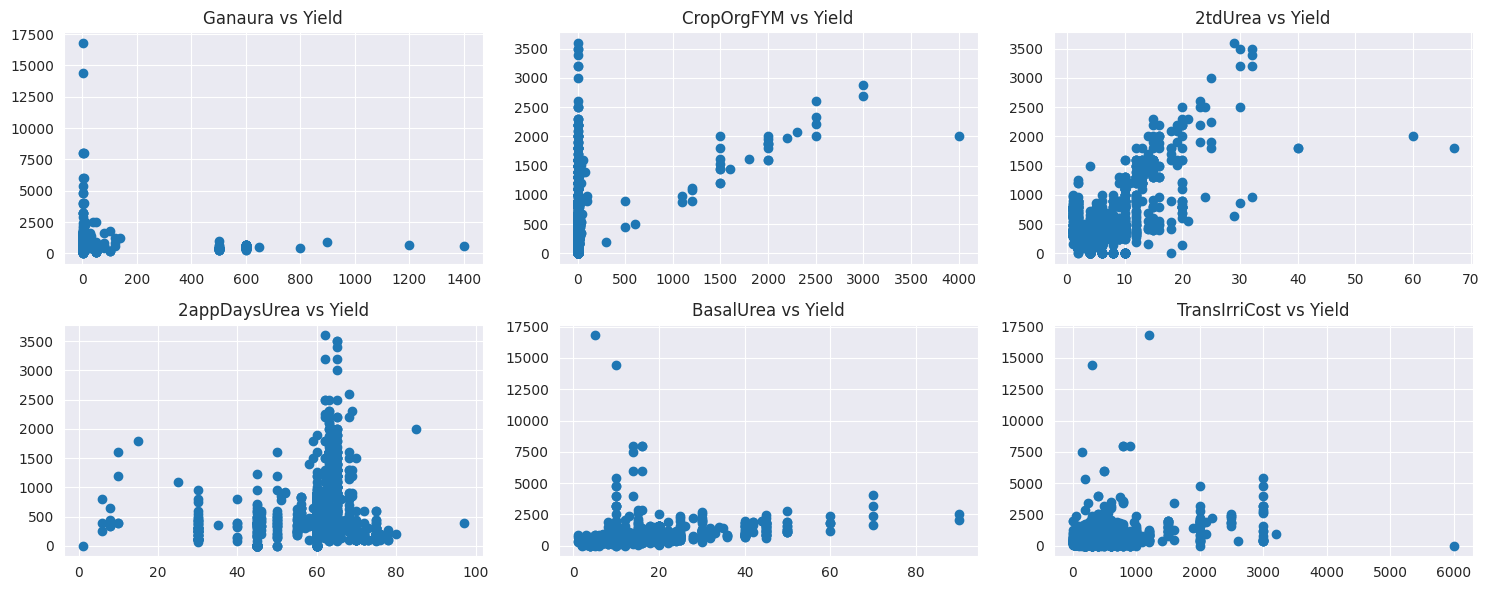

In [9]:
num_rows = (len(nan_cols) + 2) // 3
num_cols = min(len(nan_cols), 3)

fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 3 * num_rows))

for i, col in enumerate(nan_cols):
    row_index = i // num_cols
    col_index = i % num_cols
    axs[row_index, col_index].scatter(train_df[col], train_df['Yield'])
    axs[row_index, col_index].set_title(f'{col} vs Yield')

for i in range(len(nan_cols), num_rows * num_cols):
    axs.flatten()[i].axis('off')

# Adjust layout for better appearance
plt.tight_layout()
plt.show()

In [10]:
# Exclude 'BasalUrea' and '2tdUrea' from columns to be dropped
id_nan_cols = ['ID', 'Ganaura', 'CropOrgFYM', '2appDaysUrea', 'TransIrriCost']

In [11]:
train_df.drop(columns=id_nan_cols, inplace=True)
test_df.drop(columns=id_nan_cols, inplace=True)

<a id="eda"></a>
<h2 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">4. Exploratory Data Analysis</h2>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [12]:
import plotly.express as px
import plotly.graph_objects as go
sns.set_style("darkgrid")

In [13]:
!pip install kaleido

In [14]:
plot_color = ['#008080', 'black']
sns.set_palette(['#008080', 'black'])

In [15]:
num_cols = train_df.select_dtypes(include=np.number).columns.to_list()
cat_cols = train_df.select_dtypes(exclude=np.number).columns.to_list()

<a id="univariate"></a>
<h4 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">4.1. Univariate Analysis</h4>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

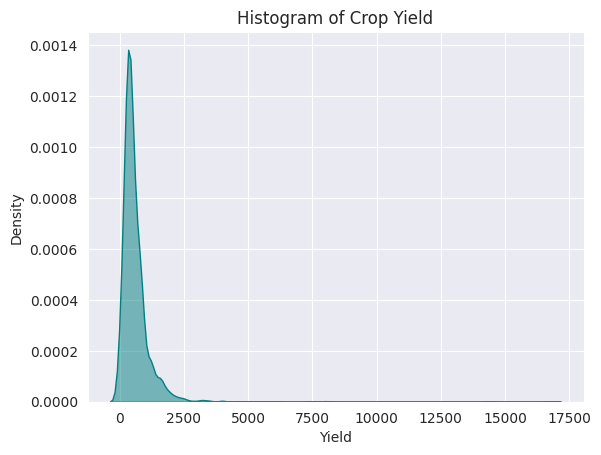

In [16]:
sns.kdeplot(data=train_df, x="Yield", fill=True, alpha=0.5)
plt.xlabel("Yield")
plt.title("Histogram of Crop Yield")
plt.show()

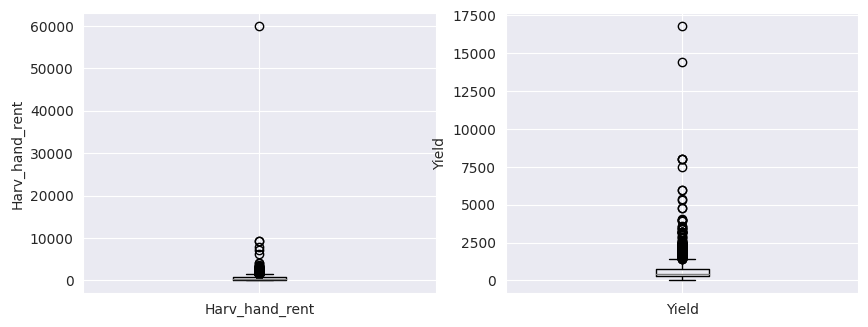

In [17]:
# Boxplots to visualize outliers
outlier_columns = ['Harv_hand_rent', 'Yield']

def plot_outliers(outlier_columns):
    plt.figure(figsize=(10,8))
    
    for idx, column in enumerate(outlier_columns):
        plt.subplot(2, 2, idx+1)
        fig = train_df.boxplot(column=column)
        fig.set_ylabel(column)
        

plot_outliers(outlier_columns)

<a id="bivariate"></a>
<h4 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">4.2. Bivariate Analysis</h4>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [18]:
corrmat = raw_df[num_cols].corr()

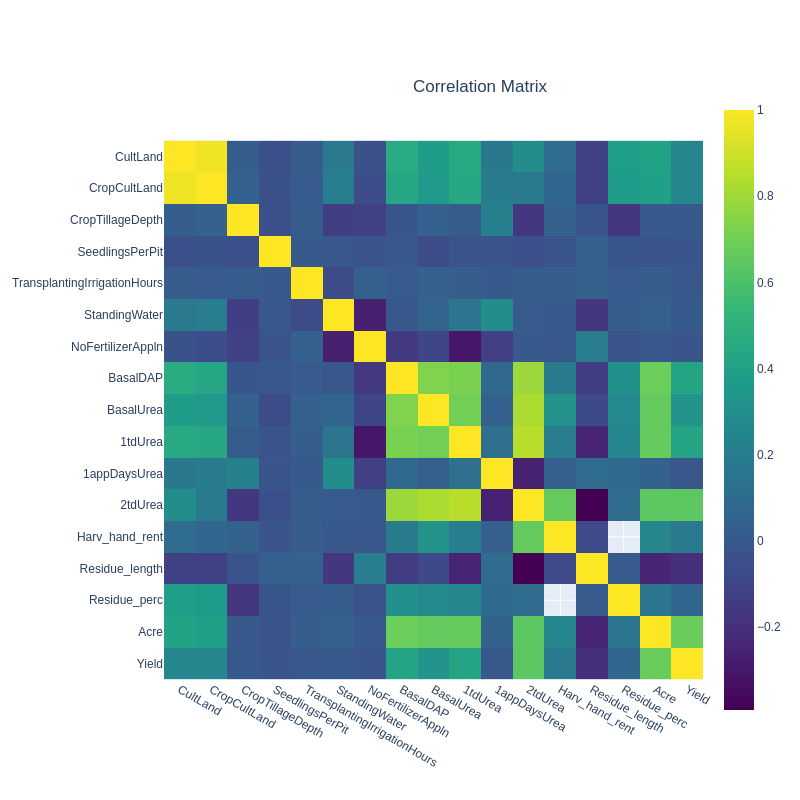

In [19]:
corr_matrix = train_df[num_cols].corr()

fig = px.imshow(corr_matrix, color_continuous_scale='Viridis', title='Correlation Matrix')
fig.update_layout(width=800, height=800, title_x=0.6, title_y=0.9)

fig.show('png')

<a id="data_preprocessing"></a>
<h2 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">5. Data Preparation and Preprocessing</h2>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [20]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn import set_config
set_config(display='diagram')

<a id="bivariate"></a>
<h4 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">5.1. Fix Outliers</h4>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [21]:
def fix_outlier(column, df):
    IQR = df[column].quantile(0.75) - df[column].quantile(0.25)
    Lower_fence = df[column].quantile(0.25) - (IQR * 3)
    Upper_fence = df[column].quantile(0.75) + (IQR * 3)
    print('{column_name} outliers are values < {lowerboundary} or > {upperboundary}'.format(column_name=column, lowerboundary=Lower_fence, upperboundary=Upper_fence))
    return df[df[column] <= Upper_fence]

In [22]:
# for column in outlier_columns:
#     train_df = fix_outlier(column, train_df)

<a id="bivariate"></a>
<h4 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">5.2. Data Preprocessing Pipeline</h4>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [23]:
X_train = train_df.drop(columns=['Yield'], axis=1)
y_train = train_df['Yield']

In [24]:
num_cols = X_train.select_dtypes(include=np.number).columns.to_list()
cat_cols = X_train.select_dtypes(exclude=np.number).columns.to_list()

print(num_cols, end='\n\n')
print(cat_cols)

['CultLand', 'CropCultLand', 'CropTillageDepth', 'SeedlingsPerPit', 'TransplantingIrrigationHours', 'StandingWater', 'NoFertilizerAppln', 'BasalDAP', 'BasalUrea', '1tdUrea', '1appDaysUrea', '2tdUrea', 'Harv_hand_rent', 'Residue_length', 'Residue_perc', 'Acre']

['District', 'Block', 'LandPreparationMethod', 'CropTillageDate', 'CropEstMethod', 'RcNursEstDate', 'SeedingSowingTransplanting', 'NursDetFactor', 'TransDetFactor', 'TransplantingIrrigationSource', 'TransplantingIrrigationPowerSource', 'OrgFertilizers', 'PCropSolidOrgFertAppMethod', 'CropbasalFerts', 'MineralFertAppMethod', 'FirstTopDressFert', 'MineralFertAppMethod.1', 'Harv_method', 'Harv_date', 'Threshing_date', 'Threshing_method', 'Stubble_use']


In [25]:
num_pipeline = Pipeline(steps=[
    ('num_imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())
])

cat_pipeline = Pipeline(steps=[
    ('cat_imputer', SimpleImputer(strategy='most_frequent')),
    ('one_hot_enc', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

In [26]:
col_trans = ColumnTransformer(transformers=[
    ('num_pipeline', num_pipeline, num_cols),
    ('cat_pipeline', cat_pipeline, cat_cols),
    ],
    remainder='drop',
    n_jobs=-1
)

In [27]:
set_config(display='diagram')
display(col_trans)

ColumnTransformer(n_jobs=-1,
                  transformers=[('num_pipeline',
                                 Pipeline(steps=[('num_imputer',
                                                  SimpleImputer()),
                                                 ('scaler', MinMaxScaler())]),
                                 ['CultLand', 'CropCultLand',
                                  'CropTillageDepth', 'SeedlingsPerPit',
                                  'TransplantingIrrigationHours',
                                  'StandingWater', 'NoFertilizerAppln',
                                  'BasalDAP', 'BasalUrea', '1tdUrea',
                                  '1appDaysUrea', '2tdUrea', 'Harv_hand_rent',
                                  'Residue_l...
                                  'RcNursEstDate', 'SeedingSowingTransplanting',
                                  'NursDetFactor', 'TransDetFactor',
                                  'TransplantingIrrigationSource',
                                  'TransplantingIrrigationPowerSource',
                                  'OrgFertilizers',
                                  'PCropSolidOrgFertAppMethod',
                                  'CropbasalFerts', 'MineralFertAppMethod',
                                  'FirstTopDressFert', 'MineralFertAppMethod.1',
                                  'Harv_method', 'Harv_date', 'Threshing_date',
                                  'Threshing_method', 'Stubble_use'])])

In [28]:
col_trans.fit(X_train)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd

ColumnTransformer(n_jobs=-1,
                  transformers=[('num_pipeline',
                                 Pipeline(steps=[('num_imputer',
                                                  SimpleImputer()),
                                                 ('scaler', MinMaxScaler())]),
                                 ['CultLand', 'CropCultLand',
                                  'CropTillageDepth', 'SeedlingsPerPit',
                                  'TransplantingIrrigationHours',
                                  'StandingWater', 'NoFertilizerAppln',
                                  'BasalDAP', 'BasalUrea', '1tdUrea',
                                  '1appDaysUrea', '2tdUrea', 'Harv_hand_rent',
                                  'Residue_l...
                                  'RcNursEstDate', 'SeedingSowingTransplanting',
                                  'NursDetFactor', 'TransDetFactor',
                                  'TransplantingIrrigationSource',
                                  'TransplantingIrrigationPowerSource',
                                  'OrgFertilizers',
                                  'PCropSolidOrgFertAppMethod',
                                  'CropbasalFerts', 'MineralFertAppMethod',
                                  'FirstTopDressFert', 'MineralFertAppMethod.1',
                                  'Harv_method', 'Harv_date', 'Threshing_date',
                                  'Threshing_method', 'Stubble_use'])])

In [29]:
# col_trans.get_feature_names_out()

In [30]:
X_train = col_trans.transform(X_train)
X_test = col_trans.transform(test_df)

assert X_train.shape[1] == X_test.shape[1]

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd

In [31]:
X_train.shape, y_train.shape

((3870, 930), (3870,))

<a id="baseline"></a>
<h2 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">6. Baseline Models</h2>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [32]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn import metrics
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

In [33]:
from catboost import CatBoostRegressor

In [34]:
lgbm_reg = LGBMRegressor(n_jobs=-1, verbose=-1, random_state=42)

In [35]:
cv = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(lgbm_reg, X_train, y_train, scoring='neg_root_mean_squared_error', cv=cv)

# Print the RMSE across folds
print('Root Mean Squared Error:', scores.mean()) 

Root Mean Squared Error: -430.70711232707237


<a id="optimization"></a>
<h2 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">7. Optimization: Hyperparameter Tuning</h2>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

<a id="grid_search_cv"></a>
<h4 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">7.1. Grid Search CV</h4>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [36]:
from sklearn import model_selection 

In [37]:
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 12, 17, 25],
    'colsample_bytree': [0.6, 0.7, 0.9, 1.0],
    
}

In [38]:
model = model_selection.GridSearchCV(
    estimator = lgbm_reg,
    param_grid = param_grid,
    scoring = 'neg_root_mean_squared_error',
    verbose = 1,
    cv = cv
)

In [39]:
# fit the model and extract best score
model.fit(X_train, y_train)

print(f"Best score: {model.best_score_}")

print("Best parameters set:")
best_parameters = model.best_estimator_.get_params()
for param_name in sorted(param_grid.keys()):
    print(f"\t{param_name}: {best_parameters[param_name]}")

Fitting 10 folds for each of 60 candidates, totalling 600 fits
Best score: -424.5005624536496
Best parameters set:
	colsample_bytree: 0.9
	learning_rate: 0.05
	max_depth: 17


<a id="randomized_search_cv"></a>
<h4 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">7.2. Randomized Search CV</h4>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [40]:
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 12, 15, 17, 25],
    'colsample_bytree': [0.6, 0.7, 0.9, 1.0],
    'num_leaves': [20, 31, 63, 127],
    'subsample': [0.5, 0.8, 0.9, 1.0],
}

In [41]:
model = model_selection.RandomizedSearchCV(
    estimator = lgbm_reg, 
    param_distributions = param_grid,
    n_iter = 10,
    scoring = 'neg_root_mean_squared_error',
    verbose = 1, 
    cv = cv
)

In [42]:
# fit the model and extract best score
model.fit(X_train, y_train)

print(f"Best score: {model.best_score_}")

print("Best parameters set:")
best_parameters = model.best_estimator_.get_params()
for param_name in sorted(param_grid.keys()):
    print(f"\t{param_name}: {best_parameters[param_name]}")

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best score: -427.42154050191004
Best parameters set:
	colsample_bytree: 0.9
	learning_rate: 0.05
	max_depth: 12
	num_leaves: 20
	subsample: 0.9


<a id="bayes_optimization"></a>
<h4 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">7.3. Bayesian Optimization with Gaussian Process</h4>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [43]:
import warnings
import time
warnings.filterwarnings("ignore")
import lightgbm as lgb
from bayes_opt import BayesianOptimization
from sklearn.metrics import roc_auc_score

In [44]:
# Define the objective function to be optimized
def lgb_eval(num_leaves, feature_fraction, bagging_fraction, max_depth, lambda_l1, lambda_l2, min_split_gain, min_child_weight):
    params = {
        'objective': 'regression',
        'metric': 'rmse',
        'num_leaves': int(num_leaves),
        'feature_fraction': max(min(feature_fraction, 1), 0),
        'bagging_fraction': max(min(bagging_fraction, 1), 0),
        'max_depth': int(max_depth),
        'lambda_l1': max(lambda_l1, 0),
        'lambda_l2': max(lambda_l2, 0),
        'min_split_gain': min_split_gain,
        'min_child_weight': min_child_weight,
        'verbose': -1,
        'nthread': -1
    }

    # LightGBM dataset
    lgb_train = lgb.Dataset(X_train, y_train)

    # Cross-validate with early stopping
    cv_result = lgb.cv(params, lgb_train, num_boost_round=1000, nfold=3, metrics=['rmse'], early_stopping_rounds=50, seed=42)

    # Return the negative RMSE (Bayesian optimization minimizes the objective function)
    return -cv_result['rmse-mean'][-1]

# Define the parameter space to be optimized
pbounds = {
    'num_leaves': (24, 64),
    'feature_fraction': (0.1, 0.9),
    'bagging_fraction': (0.8, 1),
    'max_depth': (5, 20),
    'lambda_l1': (0, 5),
    'lambda_l2': (0, 5),
    'min_split_gain': (0.001, 0.1),
    'min_child_weight': (5, 50)
}

# Bayesian optimization
optimizer = BayesianOptimization(
    f=lgb_eval,
    pbounds=pbounds,
    random_state=42,
)

# Maximize the negative objective function
optimizer.maximize(init_points=30, n_iter=70)

# Get the optimal hyperparameters
optimal_params = optimizer.max['params']
print("Optimal Hyperparameters:")
print(optimal_params)

|   iter    |  target   | baggin... | featur... | lambda_l1 | lambda_l2 | max_depth | min_ch... | min_sp... | num_le... |
-------------------------------------------------------------------------------------------------------------------------
| 1         | -468.8    | 0.8749    | 0.8606    | 3.66      | 2.993     | 7.34      | 12.02     | 0.00675   | 58.65     |
| 2         | -467.2    | 0.9202    | 0.6665    | 0.1029    | 4.85      | 17.49     | 14.56     | 0.019     | 31.34     |
| 3         | -466.7    | 0.8608    | 0.5198    | 2.16      | 1.456     | 14.18     | 11.28     | 0.02992   | 38.65     |
| 4         | -468.2    | 0.8912    | 0.7281    | 0.9984    | 2.571     | 13.89     | 7.09      | 0.06115   | 30.82     |
| 5         | -468.8    | 0.813     | 0.8591    | 4.828     | 4.042     | 9.569     | 9.395     | 0.06874   | 41.61     |
| 6         | -463.1    | 0.8244    | 0.4961    | 0.1719    | 4.547     | 8.882     | 34.81     | 0.03186   | 44.8      |
| 7         | -464.6    

In [45]:
optimal_params['num_leaves'] = int(optimal_params['num_leaves'])
optimal_params['max_depth'] = int(optimal_params['max_depth'])

In [46]:
lgbm_reg = LGBMRegressor(**optimal_params, n_jobs=-1, verbose=-1, random_state=42)

In [47]:
cv = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(lgbm_reg, X_train, y_train, scoring='neg_root_mean_squared_error', cv=cv)

# Print the RMSE across folds
print('Root Mean Squared Error:', scores.mean()) 

[LightGBM] [Warning] bagging_fraction is set=0.9539974104852039, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9539974104852039
[LightGBM] [Warning] lambda_l1 is set=0.22123377150068504, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.22123377150068504
[LightGBM] [Warning] feature_fraction is set=0.5842657262390364, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5842657262390364
[LightGBM] [Warning] lambda_l2 is set=4.023521692990339, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.023521692990339
[LightGBM] [Warning] bagging_fraction is set=0.9539974104852039, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9539974104852039
[LightGBM] [Warning] lambda_l1 is set=0.22123377150068504, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.22123377150068504
[LightGBM] [Warning] feature_fraction is set=0.5842657262390364, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5842657262390

In [48]:
# Root Mean Squared Error: -106.8470377797091
# Root Mean Squared Error: -426.36150260357135
# Root Mean Squared Error: -424.45963055160047

<a id="pred_test_data"></a>
<h2 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">8. Make Prediction on Test Data</h2>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [49]:
lgbm_reg.fit(X_train, y_train)

[LightGBM] [Warning] bagging_fraction is set=0.9539974104852039, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9539974104852039
[LightGBM] [Warning] lambda_l1 is set=0.22123377150068504, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.22123377150068504
[LightGBM] [Warning] feature_fraction is set=0.5842657262390364, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5842657262390364
[LightGBM] [Warning] lambda_l2 is set=4.023521692990339, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.023521692990339


LGBMRegressor(bagging_fraction=0.9539974104852039,
              feature_fraction=0.5842657262390364,
              lambda_l1=0.22123377150068504, lambda_l2=4.023521692990339,
              max_depth=13, min_child_weight=43.263786745437656,
              min_split_gain=0.0736315896348968, num_leaves=52, random_state=42,
              verbose=-1)

In [50]:
preds = lgbm_reg.predict(X_test)
preds

array([535.74097817, 350.85714199, 512.32009226, ..., 238.74740177,
       333.22495477, 573.5827729 ])

In [51]:
submission_df.head()

,ID,Yield
0,ID_F9XXEXN2ADR2,0
1,ID_SO3VW2X4QO93,0
2,ID_UKUQ7JM8E894,0
3,ID_QUISMWEZR2H4,0
4,ID_25JGI455VKCZ,0


In [52]:
submission_df['Yield'] = preds

submission_df.to_csv('submission.csv', index=None)

In [53]:
submission_df.head()

,ID,Yield
0,ID_F9XXEXN2ADR2,535.74
1,ID_SO3VW2X4QO93,350.86
2,ID_UKUQ7JM8E894,512.32
3,ID_QUISMWEZR2H4,341.26
4,ID_25JGI455VKCZ,538.85
